### Utilize o dataset zoo_2.csv e execute o algoritmo utilizando o método holdout, reservando apenas 20% dos dados para teste.
### ✦ Gere a matriz de confusão para os datasets de treino e teste.
### ✦ Compute as métricas (precision, recall e f1-score) para os conjutos de treino e teste.
### ✦ Avalie e compare os resultados obtidos pelo dataset de treino e teste e identifique se houve overfitting, underfitting ou se o modelo induzido gerado é adequado para utilizar em dados não vistos.
### ✦ Caso os resultados não estejam bons, altere os parâmetros do algoritmo para tentar melhorar o desempenho do modelo.

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("zoo_2.csv")
display(df)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,True,False,False,True,False,False,False,True,True,True,False,False,2,True,False,True,mammal
97,True,False,True,False,True,False,False,False,False,True,True,False,6,False,False,False,insect
98,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal
99,False,False,True,False,False,False,False,False,False,True,False,False,0,False,False,False,invertebrate


In [2]:
df.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object')

In [3]:
df["type"].unique()

array(['mammal', 'fish', 'bird', 'invertebrate', 'insect', 'amphibian',
       'reptile'], dtype=object)

In [4]:
# Dados para treino
X = df.values[:, :16]
# Dados para teste
y = df.values[:, -1:]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(80, 16)

In [6]:
X_test.shape

(21, 16)

In [7]:
from sklearn.tree import DecisionTreeClassifier
tree_decision = DecisionTreeClassifier(criterion= "gini", random_state=42, max_depth=5,min_samples_leaf=3, class_weight="balanced")
tree_decision.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=3,
                       random_state=42)

In [8]:
from sklearn.metrics import accuracy_score
y_predict = tree_decision.predict(X_test)
acuracia = accuracy_score(y_test, y_predict)
acuracia

0.9523809523809523

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matriz = confusion_matrix(y_test, y_predict)

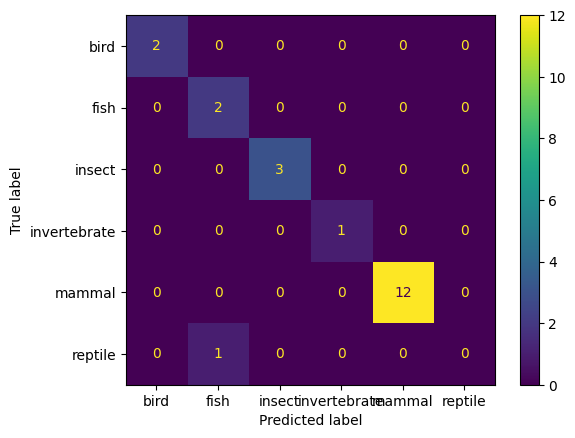

In [10]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict, zero_division=1))

              precision    recall  f1-score   support

        bird       1.00      1.00      1.00         2
        fish       0.67      1.00      0.80         2
      insect       1.00      1.00      1.00         3
invertebrate       1.00      1.00      1.00         1
      mammal       1.00      1.00      1.00        12
     reptile       1.00      0.00      0.00         1

    accuracy                           0.95        21
   macro avg       0.94      0.83      0.80        21
weighted avg       0.97      0.95      0.93        21



In [12]:
from sklearn.tree import export_text
feature_cols = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize']
r = export_text(tree_decision, feature_names=feature_cols)
print(r)

|--- milk <= 0.50
|   |--- feathers <= 0.50
|   |   |--- backbone <= 0.50
|   |   |   |--- breathes <= 0.50
|   |   |   |   |--- class: invertebrate
|   |   |   |--- breathes >  0.50
|   |   |   |   |--- airborne <= 0.50
|   |   |   |   |   |--- class: insect
|   |   |   |   |--- airborne >  0.50
|   |   |   |   |   |--- class: insect
|   |   |--- backbone >  0.50
|   |   |   |--- breathes <= 0.50
|   |   |   |   |--- class: fish
|   |   |   |--- breathes >  0.50
|   |   |   |   |--- aquatic <= 0.50
|   |   |   |   |   |--- class: reptile
|   |   |   |   |--- aquatic >  0.50
|   |   |   |   |   |--- class: amphibian
|   |--- feathers >  0.50
|   |   |--- class: bird
|--- milk >  0.50
|   |--- class: mammal

